# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 1. Introduction

## What is Julia and why is it useful?

### Comparison of execution speed of Julia, Java, Python, and C

In [ ]:
using Pkg
Pkg.activate(Base.current_project())

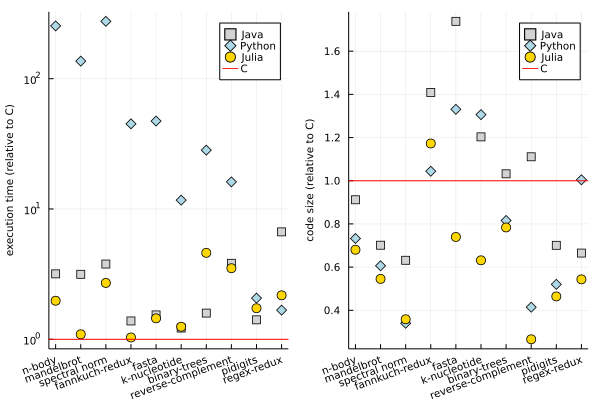

In [1]:
data = """
problem,language,time,size
n-body,C,2.13,1633
mandelbrot,C,1.3,1135
spectral norm,C,0.41,1197
fannkuch-redux,C,7.58,910
fasta,C,0.78,1463
k-nucleotide,C,3.96,1506
binary-trees,C,1.58,809
reverse-complement,C,0.41,1965
pidigits,C,0.56,1090
regex-redux,C,0.8,1397
n-body,Java,6.77,1489
mandelbrot,Java,4.1,796
spectral norm,Java,1.55,756
fannkuch-redux,Java,10.48,1282
fasta,Java,1.2,2543
k-nucleotide,Java,4.83,1812
binary-trees,Java,2.51,835
reverse-complement,Java,1.57,2183
pidigits,Java,0.79,764
regex-redux,Java,5.34,929
n-body,Python,541.34,1196
mandelbrot,Python,177.35,688
spectral norm,Python,112.97,407
fannkuch-redux,Python,341.45,950
fasta,Python,36.9,1947
k-nucleotide,Python,46.31,1967
binary-trees,Python,44.7,660
reverse-complement,Python,6.62,814
pidigits,Python,1.16,567
regex-redux,Python,1.34,1403
n-body,Julia,4.21,1111
mandelbrot,Julia,1.42,619
spectral norm,Julia,1.11,429
fannkuch-redux,Julia,7.83,1067
fasta,Julia,1.13,1082
k-nucleotide,Julia,4.94,951
binary-trees,Julia,7.28,634
reverse-complement,Julia,1.44,522
pidigits,Julia,0.97,506
regex-redux,Julia,1.74,759
"""

using CSV
using DataFrames
using Plots

df = CSV.read(IOBuffer(data), DataFrame)

plot(map([:time, :size],
         ["execution time (relative to C)",
          "code size (relative to C)"]) do col, title
    df_plot = unstack(df, :problem, :language, col)
    df_plot[!, Not(:problem)] ./= df_plot.C
    select!(df_plot, Not(:C))
    scatter(df_plot.problem, Matrix(select(df_plot, Not(:problem)));
            labels=permutedims(names(df_plot, Not(:problem))),
            ylabel=title,
            yaxis = col == :time ? :log : :none,
            xrotation=20,
            markershape=[:rect :diamond :circle],
            markersize=[4 5 5],
            markercolor=[:lightgray :lightblue :gold],
            xtickfontsize=7, ytickfontsize=7,
            legendfontsize=7, ylabelfontsize=7)
            hline!([1.0]; color=:red, labels="C")
end...)

## Key features of Julia from data scientist’s perspective

### Julia is fast because it is a compiled language

In [2]:
function sum_n(n)
    s = 0
        for i in 1:n
        s += i
        end
    return s
end
@time sum_n(1_000_000_000)

  0.000004 seconds


500000000500000000

### Julia provides a full support for interactive workflows

### Julia programs are highly reusable and easy to compose together

### Julia has an in-built package manager

### It is easy to integrate existing code with Julia

## Tabular data

In [3]:
using DataFrames

DataFrame(id=1:3,
          name=["Alice", "Bob", "Clyde"],
          age=[19, 24, 21], 
          friends=[[2], [1, 3], [2]],
          location=[(city="Atlanta", state="GA"),
                    (city="Boston", state="MA"),
                    (city="Austin", state="TX")])

,id,name,age,friends,location
,Int64,String,Int64,Array…,NamedTup…
1,1,Alice,19,[2],"(city = ""Atlanta"", state = ""GA"")"
2,2,Bob,24,"[1, 3]","(city = ""Boston"", state = ""MA"")"
3,3,Clyde,21,[2],"(city = ""Austin"", state = ""TX"")"


## Julia’s drawbacks

### Compilation takes time which is noticable in short sessions

# First steps with Julia

## Getting help in and on Julia using `?`

In [4]:
? &&

search: &&



```
x && y
```

Short-circuiting boolean AND.

See also [`&`](@ref), the ternary operator `? :`, and the manual section on [control flow](@ref man-conditional-evaluation).

# Examples

```jldoctest
julia> x = 3;

julia> x > 1 && x < 10 && x isa Int
true

julia> x < 0 && error("expected positive x")
false
```


### Julia documentation: https://docs.julialang.org/en/v1/
### Julia Slack: https://julialang.org/slack/
### Julia Discourse: https://discourse.julialang.org/

## Managing packages in Julia

### Project.toml and Manifest.toml define project environment

In [5]:
foreach(println, readlines("../Project.toml"))

[deps]
Arrow = "69666777-d1a9-59fb-9406-91d4454c9d45"
BenchmarkTools = "6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf"
CSV = "336ed68f-0bac-5ca0-87d4-7b16caf5d00b"
CategoricalArrays = "324d7699-5711-5eae-9e2f-1d82baa6b597"
CodecBzip2 = "523fee87-0ab8-5b00-afb7-3ecf72e48cfd"
Conda = "8f4d0f93-b110-5947-807f-2305c1781a2d"
DataFrames = "a93c6f00-e57d-5684-b7b6-d8193f3e46c0"
DataFramesMeta = "1313f7d8-7da2-5740-9ea0-a2ca25f37964"
Distributions = "31c24e10-a181-5473-b8eb-7969acd0382f"
FreqTables = "da1fdf0e-e0ff-5433-a45f-9bb5ff651cb1"
GLM = "38e38edf-8417-5370-95a0-9cbb8c7f171a"
Genie = "c43c736e-a2d1-11e8-161f-af95117fbd1e"
Graphs = "86223c79-3864-5bf0-83f7-82e725a168b6"
HTTP = "cd3eb016-35fb-5094-929b-558a96fad6f3"
Impute = "f7bf1975-0170-51b9-8c5f-a992d46b9575"
InlineStrings = "842dd82b-1e85-43dc-bf29-5d0ee9dffc48"
JSON3 = "0f8b85d8-7281-11e9-16c2-39a750bddbf1"
Loess = "4345ca2d-374a-55d4-8d30-97f9976e7612"
Missings = "e1d29d7a-bbdc-5cf2-9ac0-f12de2c33e28"
Plots = "91a5bcdd-55d7-5caf-9e0b-520d85

In [6]:
foreach(println, readlines("../Manifest.toml")[1:21])

# This file is machine-generated - editing it directly is not advised

julia_version = "1.7.3"
manifest_format = "2.0"

[[deps.AbstractFFTs]]
deps = ["ChainRulesCore", "LinearAlgebra"]
git-tree-sha1 = "69f7020bd72f069c219b5e8c236c1fa90d2cb409"
uuid = "621f4979-c628-5d54-868e-fcf4e3e8185c"
version = "1.2.1"

[[deps.Adapt]]
deps = ["LinearAlgebra"]
git-tree-sha1 = "195c5505521008abea5aee4f96930717958eac6f"
uuid = "79e6a3ab-5dfb-504d-930d-738a2a938a0e"
version = "3.4.0"

[[deps.ArgCheck]]
git-tree-sha1 = "a3a402a35a2f7e0b87828ccabbd5ebfbebe356b4"
uuid = "dce04be8-c92d-5529-be00-80e4d2c0e197"
version = "2.3.0"


### In Jupyter Notebook project environment is automatically activated

### Managing packages

Please refer to the "Julia for Data Analysis" book, Appendix A, for details how to manage packages.

In [7]:
] status

      Status `C:\Users\bogum\Desktop\Manning\book_v2\codes\JuliaForDataAnalysis\Project.toml`
  [69666777] Arrow v2.3.0
  [6e4b80f9] BenchmarkTools v1.3.1
  [336ed68f] CSV v0.10.4
  [324d7699] CategoricalArrays v0.10.6
  [523fee87] CodecBzip2 v0.7.2
  [8f4d0f93] Conda v1.7.0
  [a93c6f00] DataFrames v1.3.4
  [1313f7d8] DataFramesMeta v0.12.0
  [31c24e10] Distributions v0.25.70
  [da1fdf0e] FreqTables v0.4.5
  [38e38edf] GLM v1.8.0
  [c43c736e] Genie v5.3.1
  [86223c79] Graphs v1.7.2
  [cd3eb016] HTTP v1.3.3
  [f7bf1975] Impute v0.6.8
  [842dd82b] InlineStrings v1.1.4
  [0f8b85d8] JSON3 v1.9.5
  [4345ca2d] Loess v0.5.4
  [e1d29d7a] Missings v1.0.2
  [91a5bcdd] Plots v1.31.7
  [2dfb63ee] PooledArrays v1.4.2
  [438e738f] PyCall v1.94.1
  [6f49c342] RCall v0.13.13
  [f535d66d] ROCAnalysis v0.3.5
  [0aa819cd] SQLite v1.4.2
  [2913bbd2] StatsBase v0.33.21
  [ac1d9e8a] ThreadsX v0.1.10
  [a5390f91] ZipFile v0.10.0
